# **Assignment: Regression Analysis**

---

## **Part 1: Theory**


1. What does R-squared represent in a regression model?
   - R-squared measures the proportion of variance in the dependent variable explained by the independent variables.
     It ranges from 0 to 1, where higher values indicate better fit.

2. What are the assumptions of linear regression?
   - Linearity: The relationship between X and y is linear.
   - Independence: Residuals are independent.
   - Homoscedasticity: Constant variance of residuals.
   - Normality: Residuals are normally distributed.
   - No multicollinearity: Independent variables are not highly correlated.

3. What is the difference between R-squared and Adjusted R-squared?
   - R-squared increases with more predictors, while Adjusted R-squared penalizes unnecessary predictors.

4. Why do we use Mean Squared Error (MSE)?
   - MSE quantifies the average squared difference between predicted and actual values, emphasizing larger errors.

5. What does an Adjusted R-squared value of 0.85 indicate?
   - 85% of the variance in the dependent variable is explained by the model after adjusting for the number of predictors.

6. How do we check for normality of residuals in linear regression?
   - Use Q-Q plots or statistical tests like the Shapiro-Wilk test.

7. What is multicollinearity, and how does it impact regression?
   - Multicollinearity occurs when predictors are highly correlated, leading to unstable coefficient estimates.

8. What is Mean Absolute Error (MAE)?
   - MAE measures the average absolute difference between predicted and actual values.

9. What are the benefits of using an ML pipeline?
   - Ensures reproducibility, simplifies preprocessing, and avoids data leakage.

10. Why is RMSE considered more interpretable than MSE?
    - RMSE is in the same unit as the target variable, making it easier to interpret.

11. What is pickling in Python, and how is it useful in ML?
    - Pickling serializes Python objects (e.g., models) into a file for later use, enabling model persistence.

12. What does a high R-squared value mean?
    - A high R-squared indicates that the model explains most of the variance in the dependent variable.

13. What happens if linear regression assumptions are violated?
    - Violations can lead to biased coefficients, unreliable predictions, and incorrect inference.

14. How can we address multicollinearity in regression?
    - Remove highly correlated features, use regularization (e.g., Ridge), or apply dimensionality reduction (e.g., PCA).

15. How can feature selection improve model performance in regression analysis?
    - Feature selection reduces noise, prevents overfitting, and improves interpretability.

16. How is Adjusted R-squared calculated?
    - Adjusted R² = 1 - [(1 - R²) * (n - 1) / (n - k - 1)], where n is the sample size and k is the number of predictors.

17. Why is MSE sensitive to outliers?
    - MSE squares the errors, so large errors (outliers) disproportionately affect the metric.

18. What is the role of homoscedasticity in linear regression?
    - Homoscedasticity ensures that residuals have constant variance, which is necessary for unbiased coefficient estimates.

19. What is Root Mean Squared Error (RMSE)?
    - RMSE is the square root of MSE and represents the standard deviation of prediction errors.

20. Why is pickling considered risky?
    - Pickling can execute arbitrary code during deserialization, posing security risks.

21. What alternatives exist to pickling for saving ML models?
    - Alternatives include `joblib` (optimized for large NumPy arrays) and formats like JSON or ONNX.

22. What is heteroscedasticity, and why is it a problem?
    - Heteroscedasticity refers to non-constant variance in residuals, leading to inefficient estimates and unreliable inference.

23. How can interaction terms enhance a regression model's predictive power?
    - Interaction terms capture relationships between predictors, improving the model's ability to explain complex patterns.


## **Part 2: Practical**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
import joblib

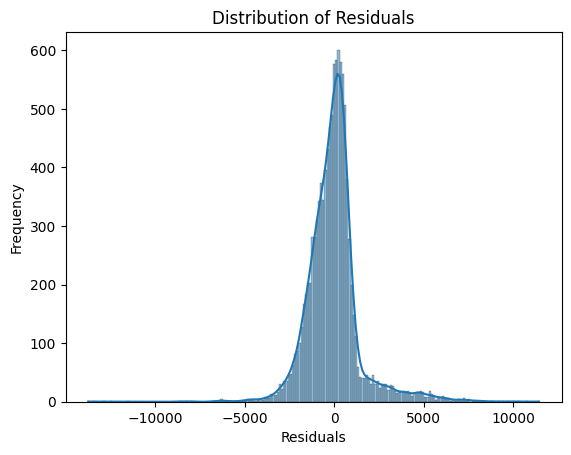

In [2]:
# 1. Visualize the distribution of errors (residuals) for a multiple linear regression model using Seaborn's "diamonds" dataset.
diamonds = sns.load_dataset('diamonds')
X = diamonds[['carat', 'depth', 'table']]
y = diamonds['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [3]:
# 2. Calculate and print MSE, MAE, and RMSE for a linear regression model.
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MSE: 2333883.18
MAE: 994.74
RMSE: 1527.71


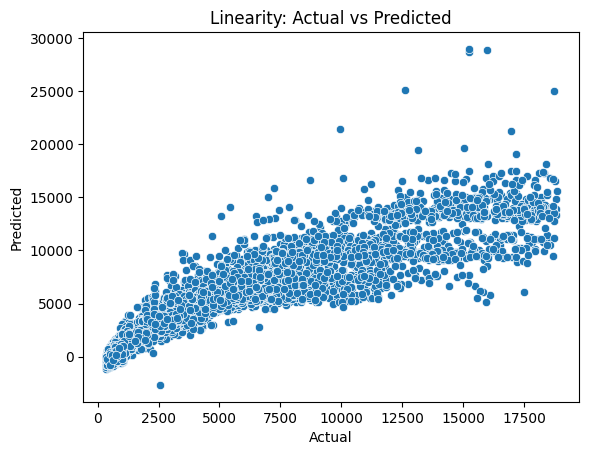

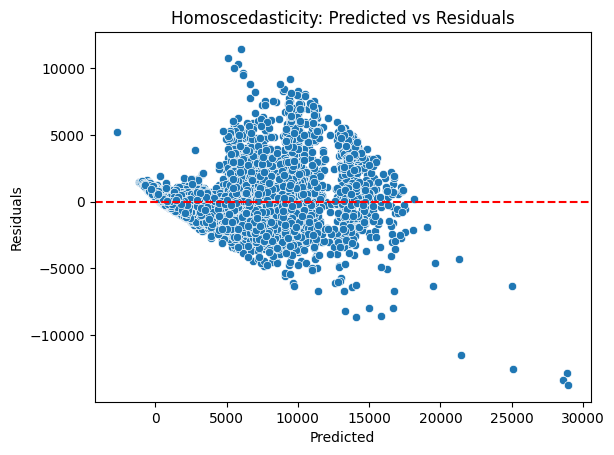

  Feature         VIF
0   carat    3.928109
1   depth  389.408663
2   table  396.889053


In [4]:
# 3. Check if the assumptions of linear regression are met.
# Linearity
sns.scatterplot(x=y_test, y=y_pred)
plt.title("Linearity: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# Homoscedasticity
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Homoscedasticity: Predicted vs Residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# Multicollinearity
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

In [5]:
# 4. Create a machine learning pipeline with feature scaling and evaluate performance.
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)
y_pred_pipeline = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred_pipeline)
print(f"R-squared Score: {r2:.2f}")

R-squared Score: 0.85


In [6]:
# 5. Implement a simple linear regression model and print coefficients, intercept, and R-squared score.
X_simple = diamonds[['carat']]
y_simple = diamonds['price']

X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

model_simple = LinearRegression()
model_simple.fit(X_train_simple, y_train_simple)

print(f"Coefficient: {model_simple.coef_[0]:.2f}")
print(f"Intercept: {model_simple.intercept_:.2f}")
print(f"R-squared: {model_simple.score(X_test_simple, y_test_simple):.2f}")

Coefficient: 7768.91
Intercept: -2261.91
R-squared: 0.85


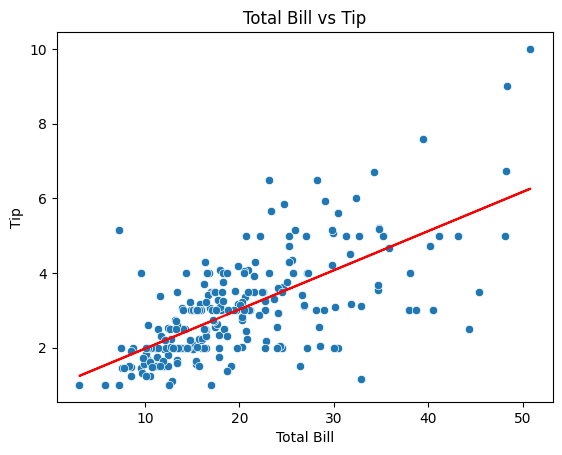

In [7]:
# 6. Analyze the relationship between total bill and tip using simple linear regression.
tips = sns.load_dataset('tips')
X_tips = tips[['total_bill']]
y_tips = tips['tip']

model_tips = LinearRegression()
model_tips.fit(X_tips, y_tips)

sns.scatterplot(x=tips['total_bill'], y=tips['tip'])
plt.plot(X_tips, model_tips.predict(X_tips), color='red')
plt.title("Total Bill vs Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()

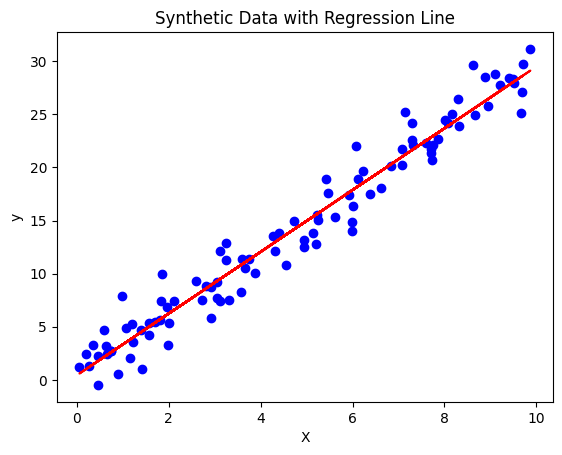

In [8]:
# 7. Fit a linear regression model to synthetic data and plot the regression line.
np.random.seed(42)
X_synthetic = np.random.rand(100, 1) * 10
y_synthetic = 3 * X_synthetic.squeeze() + np.random.randn(100) * 2

model_synthetic = LinearRegression()
model_synthetic.fit(X_synthetic, y_synthetic)

plt.scatter(X_synthetic, y_synthetic, color='blue')
plt.plot(X_synthetic, model_synthetic.predict(X_synthetic), color='red')
plt.title("Synthetic Data with Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [9]:
# 8. Pickle a trained linear regression model.
joblib.dump(model_synthetic, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

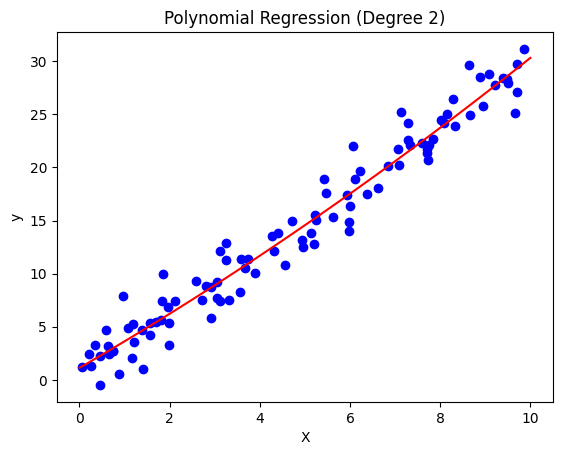

In [10]:
# 9. Fit a polynomial regression model (degree 2) and plot the curve.
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_synthetic)

model_poly = LinearRegression()
model_poly.fit(X_poly, y_synthetic)

X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)

plt.scatter(X_synthetic, y_synthetic, color='blue')
plt.plot(X_plot, model_poly.predict(X_plot_poly), color='red')
plt.title("Polynomial Regression (Degree 2)")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [11]:
# 10. Generate synthetic data for simple linear regression.
np.random.seed(42)
X_random = np.random.rand(100, 1) * 5
y_random = 2.5 * X_random.squeeze() + np.random.randn(100) * 1.5

model_random = LinearRegression()
model_random.fit(X_random, y_random)

print(f"Coefficient: {model_random.coef_[0]:.2f}")
print(f"Intercept: {model_random.intercept_:.2f}")

Coefficient: 2.36
Intercept: 0.32


In [12]:
# 11. Fit polynomial regression models of different degrees and compare performance.
degrees = [1, 2, 3, 4]
r2_scores = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_synthetic)

    model_poly = LinearRegression()
    model_poly.fit(X_poly, y_synthetic)

    r2_scores.append(model_poly.score(X_poly, y_synthetic))

results = pd.DataFrame({'Degree': degrees, 'R-squared': r2_scores})
print(results)

   Degree  R-squared
0       1   0.958273
1       2   0.959793
2       3   0.960038
3       4   0.960500


In [13]:
# 12. Fit a simple linear regression model with two features and print coefficients, intercept, and R-squared score.
X_two_features = diamonds[['carat', 'depth']]
y_two_features = diamonds['price']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_two_features, y_two_features, test_size=0.2, random_state=42)

model_two_features = LinearRegression()
model_two_features.fit(X_train_2, y_train_2)

print(f"Coefficients: {model_two_features.coef_}")
print(f"Intercept: {model_two_features.intercept_:.2f}")
print(f"R-squared: {model_two_features.score(X_test_2, y_test_2):.2f}")

Coefficients: [7778.74124426  -99.77691694]
Intercept: 3890.77
R-squared: 0.85


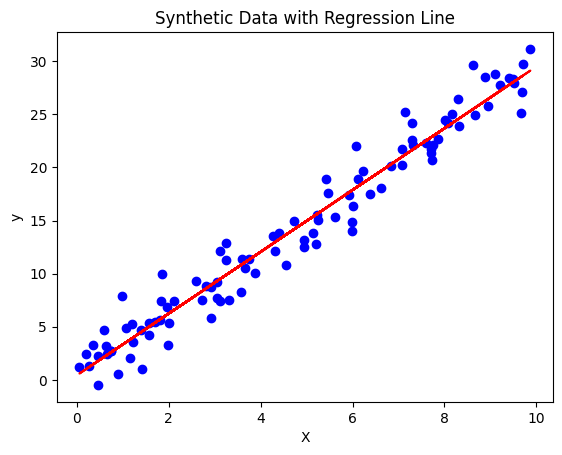

In [14]:
# 13. Generate synthetic data, fit a linear regression model, and visualize the regression line.
np.random.seed(42)
X_synth = np.random.rand(100, 1) * 10
y_synth = 3 * X_synth.squeeze() + np.random.randn(100) * 2

model_synth = LinearRegression()
model_synth.fit(X_synth, y_synth)

plt.scatter(X_synth, y_synth, color='blue')
plt.plot(X_synth, model_synth.predict(X_synth), color='red')
plt.title("Synthetic Data with Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [16]:
# 14. Use Variance Inflation Factor (VIF) to check multicollinearity.
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

  Feature         VIF
0   carat    3.928109
1   depth  389.408663
2   table  396.889053


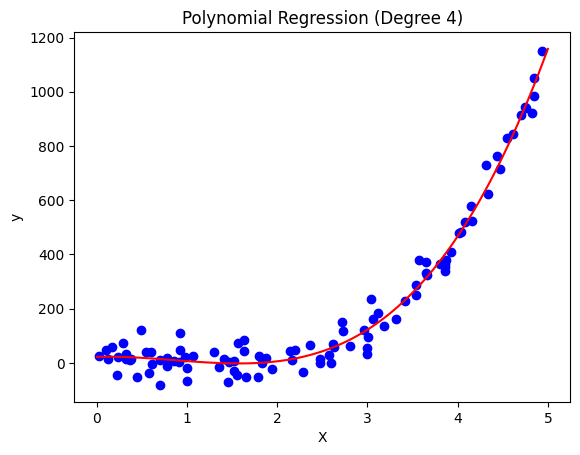

In [17]:
# 15. Generate synthetic data for a polynomial relationship (degree 4), fit a polynomial regression model, and plot the curve.
np.random.seed(42)
X_poly_synth = np.random.rand(100, 1) * 5
y_poly_synth = 2 * X_poly_synth.squeeze()**4 - 3 * X_poly_synth.squeeze()**2 + np.random.randn(100) * 50

poly = PolynomialFeatures(degree=4)
X_poly_transformed = poly.fit_transform(X_poly_synth)

model_poly_synth = LinearRegression()
model_poly_synth.fit(X_poly_transformed, y_poly_synth)

X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)

plt.scatter(X_poly_synth, y_poly_synth, color='blue')
plt.plot(X_plot, model_poly_synth.predict(X_plot_poly), color='red')
plt.title("Polynomial Regression (Degree 4)")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [18]:
# 16. Create a machine learning pipeline with data standardization and a multiple linear regression model, and print the R-squared score.
pipeline_standardized = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipeline_standardized.fit(X_train, y_train)
y_pred_pipeline = pipeline_standardized.predict(X_test)

r2 = r2_score(y_test, y_pred_pipeline)
print(f"R-squared Score: {r2:.2f}")

R-squared Score: 0.85


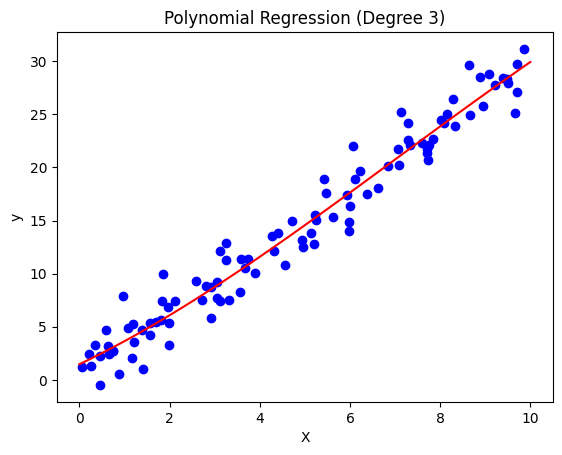

In [19]:
# 17. Perform polynomial regression (degree 3) on a synthetic dataset and plot the regression curve.
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_synthetic)

model_poly_3 = LinearRegression()
model_poly_3.fit(X_poly, y_synthetic)

X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)

plt.scatter(X_synthetic, y_synthetic, color='blue')
plt.plot(X_plot, model_poly_3.predict(X_plot_poly), color='red')
plt.title("Polynomial Regression (Degree 3)")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [20]:
# 18. Perform multiple linear regression on a synthetic dataset with 5 features. Print the R-squared score and model coefficients.
np.random.seed(42)
X_multi = np.random.rand(100, 5) * 10
y_multi = np.sum(X_multi, axis=1) + np.random.randn(100) * 5

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train_multi)

print(f"Coefficients: {model_multi.coef_}")
print(f"Intercept: {model_multi.intercept_:.2f}")
print(f"R-squared: {model_multi.score(X_test_multi, y_test_multi):.2f}")

Coefficients: [0.82647934 0.88303834 1.32395165 1.0727923  0.77717992]
Intercept: 0.73
R-squared: 0.50


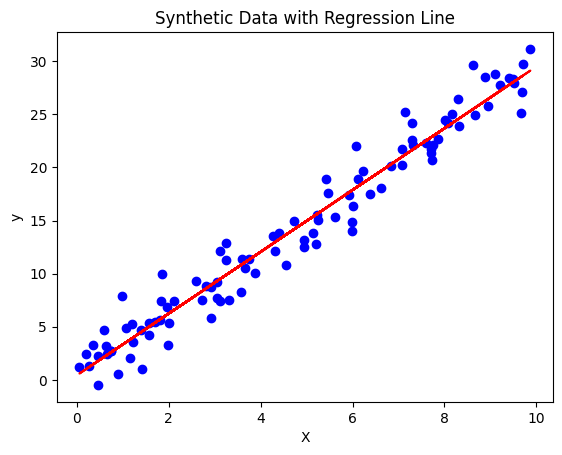

In [21]:
# 19. Generate synthetic data for linear regression, fit a model, and visualize the data points along with the regression line.
np.random.seed(42)
X_synth = np.random.rand(100, 1) * 10
y_synth = 3 * X_synth.squeeze() + np.random.randn(100) * 2

model_synth = LinearRegression()
model_synth.fit(X_synth, y_synth)

plt.scatter(X_synth, y_synth, color='blue')
plt.plot(X_synth, model_synth.predict(X_synth), color='red')
plt.title("Synthetic Data with Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [22]:
# 20. Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's R-squared score and coefficients.
np.random.seed(42)
X_three_features = np.random.rand(100, 3) * 10
y_three_features = np.sum(X_three_features, axis=1) + np.random.randn(100) * 5

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_three_features, y_three_features, test_size=0.2, random_state=42)

model_three_features = LinearRegression()
model_three_features.fit(X_train_3, y_train_3)

print(f"Coefficients: {model_three_features.coef_}")
print(f"Intercept: {model_three_features.intercept_:.2f}")
print(f"R-squared: {model_three_features.score(X_test_3, y_test_3):.2f}")

Coefficients: [1.05294884 0.962303   1.34302962]
Intercept: -0.43
R-squared: 0.32


In [23]:
# 21. Demonstrate how to serialize and deserialize machine learning models using joblib instead of pickling.
joblib.dump(model_synth, 'linear_regression_model_joblib.pkl')

# Deserialize the model
loaded_model = joblib.load('linear_regression_model_joblib.pkl')
print(f"Loaded Model Coefficients: {loaded_model.coef_}")

Loaded Model Coefficients: [2.90804535]


In [24]:
# 22. Perform linear regression with categorical features using one-hot encoding.
tips_encoded = pd.get_dummies(tips, drop_first=True)
X_tips_encoded = tips_encoded.drop('tip', axis=1)
y_tips_encoded = tips_encoded['tip']

X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_tips_encoded, y_tips_encoded, test_size=0.2, random_state=42)

model_encoded = LinearRegression()
model_encoded.fit(X_train_encoded, y_train_encoded)

print(f"R-squared: {model_encoded.score(X_test_encoded, y_test_encoded):.2f}")

R-squared: 0.44


In [25]:
# 23. Compare Ridge Regression with Linear Regression on a synthetic dataset.
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_multi, y_train_multi)

print("Linear Regression Coefficients:", model_multi.coef_)
print("Ridge Regression Coefficients:", ridge_model.coef_)
print(f"Linear Regression R-squared: {model_multi.score(X_test_multi, y_test_multi):.2f}")
print(f"Ridge Regression R-squared: {ridge_model.score(X_test_multi, y_test_multi):.2f}")

Linear Regression Coefficients: [0.82647934 0.88303834 1.32395165 1.0727923  0.77717992]
Ridge Regression Coefficients: [0.82493116 0.88158265 1.32144682 1.07103462 0.77627861]
Linear Regression R-squared: 0.50
Ridge Regression R-squared: 0.50


In [26]:
# 24. Use cross-validation to evaluate a Linear Regression model on a synthetic dataset.
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(LinearRegression(), X_multi, y_multi, cv=5, scoring='r2')
print(f"Cross-Validation R-squared Scores: {cv_scores}")
print(f"Mean R-squared: {np.mean(cv_scores):.2f}")

Cross-Validation R-squared Scores: [0.24317046 0.49307399 0.59970641 0.65118032 0.40232705]
Mean R-squared: 0.48


In [27]:
# 25. Compare polynomial regression models of different degrees and print the R-squared score for each.
degrees = [1, 2, 3, 4]
r2_scores = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_synthetic)

    model_poly = LinearRegression()
    model_poly.fit(X_poly, y_synthetic)

    r2_scores.append(model_poly.score(X_poly, y_synthetic))

results = pd.DataFrame({'Degree': degrees, 'R-squared': r2_scores})
print(results)

   Degree  R-squared
0       1   0.958273
1       2   0.959793
2       3   0.960038
3       4   0.960500
